# El problema

Dados dos puntos $A=(a,x_a)$ y $B=(b,x_b)$ con $a<b$, considere
- la gráfica de todas las funciones $x\in\mathcal{C}^1([a,b],\mathbb{R})$ que conecta a los puntos $A$ y $B$ 
- La superficie de revolución que se genera al girar la gráfica con respecto al eje horizontal.
Se quiere encontrar, de entre todas las curvas que unen a $A$ con $B$, auqella cuya superficie es mínima y el volumen que encierra es igual a un volumen dado.

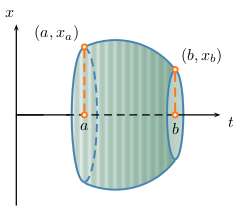

## Un ejemplo en $\mathbb{R}^2$

Dados los puntos $A=(-1,0)$ y $B=(1,0)$ y volumen $v=\pi$ se quiere encontrar una función $x$(*bonita* i.e al menos de clase $\mathcal{C}^1$) cuya gráfica una a $A$ y $B$ de modo que al rotar la gráfica $x(t)=\sqrt{1-x^2}$ y el sólido que se genera a partir de esta curva es

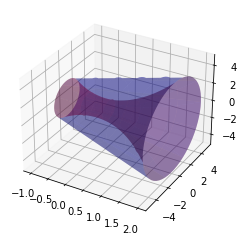

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

u = np.linspace(-1, 2, 60)
v = np.linspace(0, 2*np.pi, 60)
U, V = np.meshgrid(u, v)

X = U
Y1 = (U**2 + 1)*np.cos(V)
Z1 = (U**2 + 1)*np.sin(V)

Y2 = (U + 3)*np.cos(V)
Z2 = (U + 3)*np.sin(V)

ax.plot_surface(X, Y1, Z1, alpha=0.3, color='red', rstride=6, cstride=12)
ax.plot_surface(X, Y2, Z2, alpha=0.3, color='blue', rstride=6, cstride=12)
plt.show()

# Objetivo

## En palabras

**Encontrar la curva $x^*$ que minimice el área de la superficie generada sujeta a la condición que debe tener un volumen $v\in\mathbb{R}^+$ dado.**

## Matemáticamente

Resolver el problema de optimización
\begin{equation*}
     J[x]=\int_a^b2\pi x(t)\sqrt{1+\dot{x}^2(t)}dt \to \inf_{x\in \mathcal{D}_G} \quad\mbox{sujeto a }\quad G[x]=\int_a^b\pi x^2(t)dt=v
\end{equation*}

en donde $\mathcal{D}_G=\{x\in\mathcal{C}^1 : G[x]=v\}$ es decir el conjunto de funciones que cumplen la restricción.

*La restricción del problema de optimización se define de esa forma pues se quiere que la superficie de área mínima cumpla además con tener volumen $v$ y una manera de obtener el volumen de un sólido de revolución como el buscado es integrando la función $v(x)=\pi x^2$.*

# Métodos numéricos a implementar

* Para hallar la solución numérica al problema de optimización
> Método de Runge Kutta de orden 4. 
Este método sirve para aproximar la solución del problema de valor inicial (i.e una ecuación diferencial con valor incial) del tipo
\begin{equation}
y'=f(t,y)\quad t\in[a,b]\quad y(a)=\alpha
\end{equation}

* Para verificar que la solución satisface la restricción
> Algún método de integración visto en clase